In [82]:
from PartSeg.utils.analysis.load_functions import LoadImage
from PartSeg.utils.analysis import load_metadata, analysis_algorithm_dict
import tifffile
from glob import glob 
from matplotlib import pyplot as plt 
import SimpleITK as sitk 
import numpy as np 
from skimage.filters import rank
from skimage.morphology import disk

In [83]:
files_list = glob("/media/czaki/Grzesiek/Neutrofile/2019_04_24--ecoli_neu_tiff_converted/*")

In [97]:
file_path = files_list[0]
file_path 

'/media/czaki/Grzesiek/Neutrofile/2019_04_24--ecoli_neu_tiff_converted/Ecoli neu_t0 2 Un 004.tif'

In [85]:
project_tuple = LoadImage.load([file_path])

In [ ]:
data = project_tuple.image.get_channel(1)[0, 0]

In [ ]:
res1 = sitk.GetArrayFromImage(sitk.CannyEdgeDetection(sitk.GetImageFromArray(data.astype(np.float))))
res2 = sitk.GetArrayFromImage(sitk.CannyEdgeDetection(sitk.GetImageFromArray(np.min([project_tuple.image.get_channel(i)[0, 0] for i in range(3)], axis=0).astype(np.float))))

In [110]:
radius = 5
selem = disk(radius)
res1 = rank.otsu(data, selem)
radius = 50
selem = disk(radius)
res2 = rank.otsu(res1, selem)
# res2 = data < res1

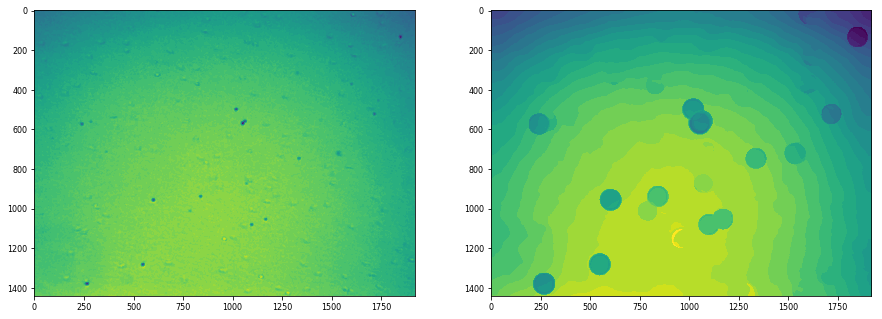

In [111]:
f, axx = plt.subplots(1, 2, figsize= (15, 10))
# area = (slice(420, 650), slice(950, 1150))
area = (slice(0, data.shape[0]), slice(0, data.shape[1]))

axx[0].imshow(res1[area])
axx[1].imshow(res2[area])

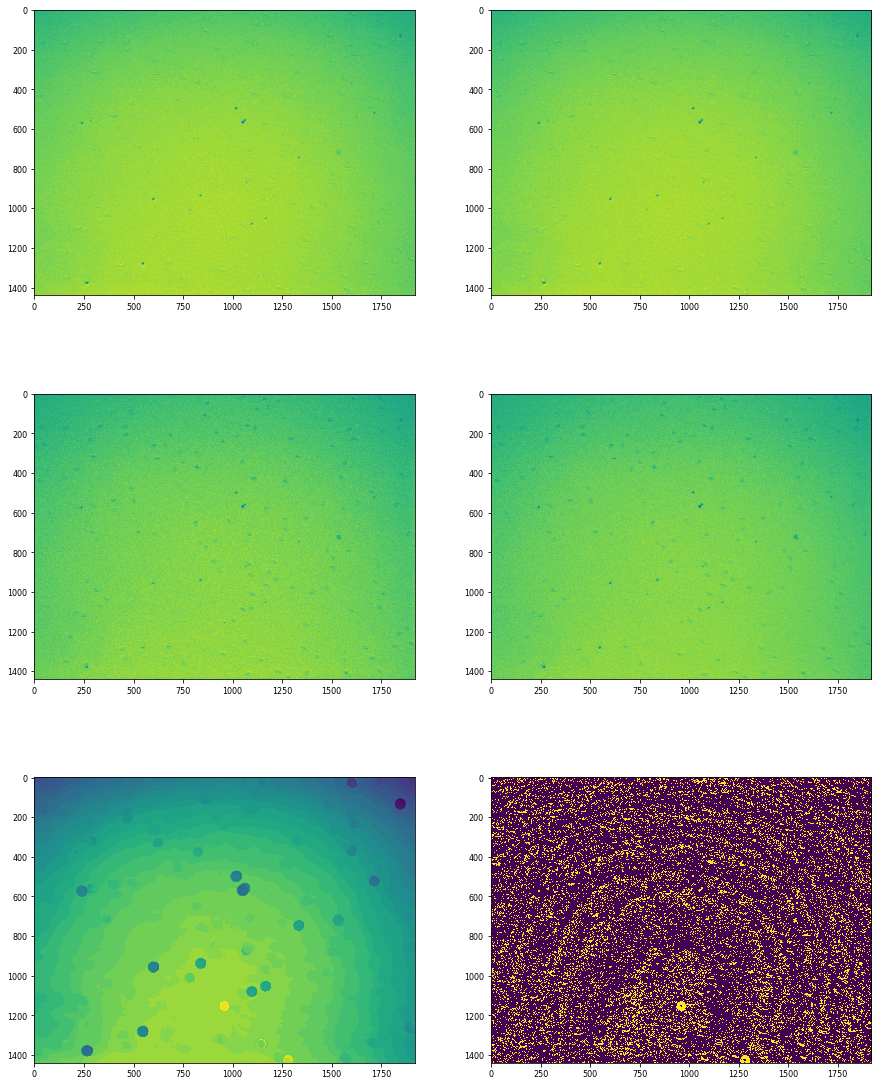

In [96]:
# area = (slice(420, 650), slice(950, 1150))
area = (slice(0, data.shape[0]), slice(0, data.shape[1]))
f, axx = plt.subplots(3, 2, figsize= (15, 20))

axx[0,0].imshow(data[area], vmin=140, vmax=230)
axx[0,1].imshow(project_tuple.image.get_channel(1)[0, 0][area], vmin=140, vmax=230)
axx[1,0].imshow(project_tuple.image.get_channel(2)[0, 0][area], vmin=140, vmax=230)
axx[1,1].imshow(np.min([project_tuple.image.get_channel(i)[0, 0] for i in range(3)], axis=0)[area], vmin=140, vmax=230)
axx[2,0].imshow(res1[area])
axx[2,1].imshow(res2[area])

224